In [1]:
# This Notebook loads a dataset from the data cube, and displays it as an RGB plot.

In [5]:
import datacube
from datacube.storage.masking import mask_invalid_data

dc = datacube.Datacube()

In [6]:
# Declare some 'constants' for the program
p = 'LE07_scene'
start = '2013'
end = '2014'
fake_saturation = 400000
res = (0.0025, -0.0025)
m1 = 'red'
m2 = 'green'
m3 = 'blue'

In [7]:
# Load data as an xarray.Dataset
data = dc.load(product = p
               #, time = (start, end)
               , measurements=[m1, m2, m3]
               , resolution = res
              )

In [8]:
# Use the masking library to strip invalid data
data = mask_invalid_data(data)

In [9]:
# Isolate the color dimension in an xarray.DataArray, use transpose to make color the last dimension
rgb = (data.to_array(dim='color'))
rgb = rgb.transpose(*(rgb.dims[1:]+rgb.dims[:1])) 

# Mask out pixels where any band is 'saturated'
rgb = rgb.where((rgb <= fake_saturation).all(dim='color'))
# Scale to [0, 1] range for imshow
rgb /= fake_saturation  

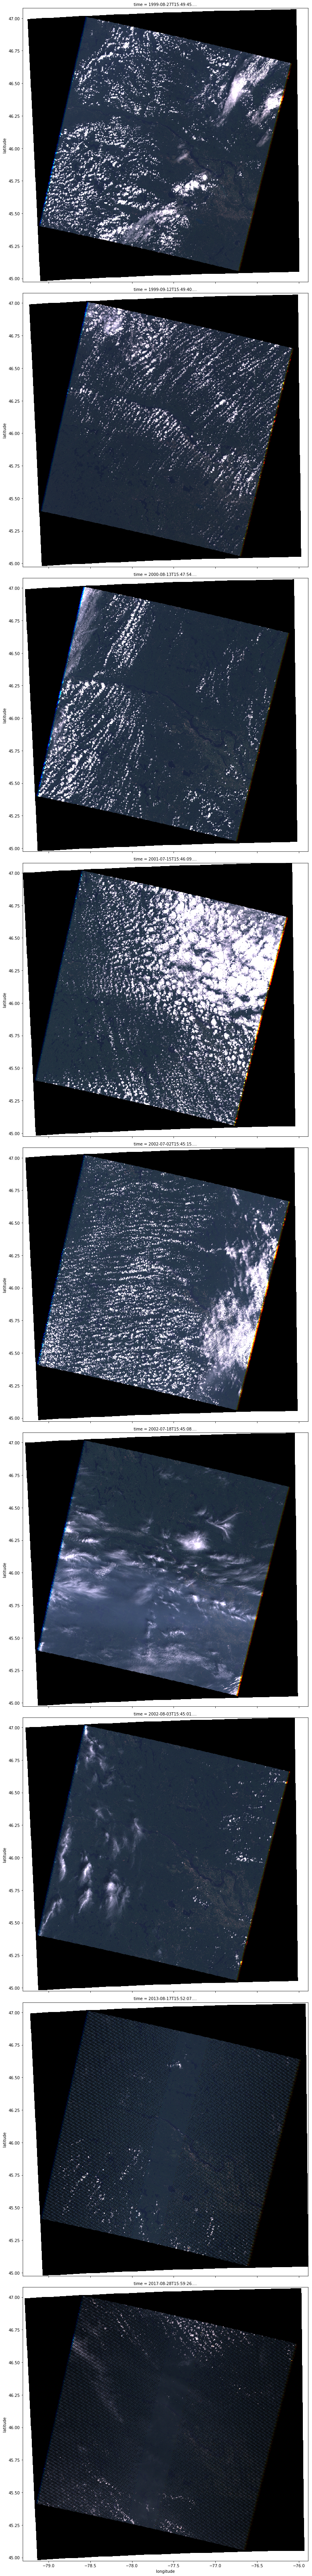

In [11]:
# Plot the results
rgb.plot.imshow( x = data.crs.dimensions[1]
                , y = data.crs.dimensions[0]
                , col = 'time'
                , col_wrap = 1
                , size = 10
                , add_colorbar = False
               )